# Chapter 2 Linear Regression

## 2.1 Least Squares

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn  
# Standard normal random numbers are used often, so import it as randn

In [4]:
def min_sq(x,y):  # function that computes the slop and intercept
    x_bar,y_bar=np.mean(x),np.mean(y)
    beta_1=np.dot(x-x_bar,y-y_bar)/np.linalg.norm(x-x_bar)**2
    beta_0=y_bar-beta_1*x_bar
    return  [beta_1,beta_0]
N=100
a=randn(1)+2  # slop
b=randn(1) # intercept
x=randn(N)  
y=a*x+b+randn(N)  # artificial data has been generated 
a1,b1=min_sq(x,y)           # Coefficients and intercept
xx=x-np.mean(x);yy=y-np.mean(y) # Centralization
a2,b2=min_sq(xx,yy)         # Coefficients/intercepts after centralization

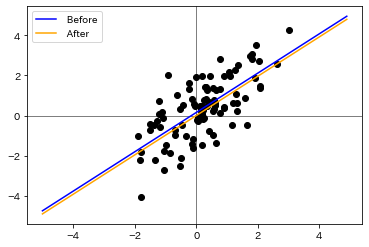

In [5]:
x_seq=np.arange(-5,5,0.1)
y_pre=x_seq*a1+b1
yy_pre=x_seq*a2+b2
plt.scatter(x,y,c="black")
plt.axhline(y=0,c="black",linewidth=0.5)
plt.axvline(x=0,c="black",linewidth=0.5)
plt.plot(x_seq,y_pre,c="blue",label=" Before")
plt.plot(x_seq,yy_pre,c="orange",label=" After")
plt.legend(loc="upper left")

## 2.2 Multiple Regression

In [8]:
n=100;p=2
beta=np.array([1,2,3])
x=randn(n,2)
y=beta[0]+beta[1]*x[:,0]+beta[2]*x[:,1]+randn(n)
X= np.insert(x, 0, 1, axis=1) # Set ones for the leftmost column
np.linalg.inv(X.T@X)@X.T@y  # Estimate beta

array([1.01302258, 2.03815866, 3.11422637])

## 2.3 Distribution of β

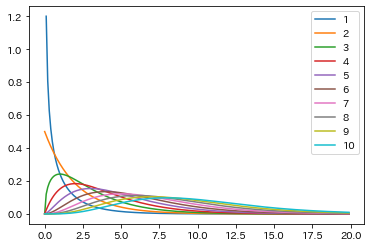

In [6]:
x=np.arange(0,20,0.1)
for i in range(1,11):
    plt.plot(x,stats.chi2.pdf(x, i),label='{}'.format(i))
plt.legend(loc='upper right')

## 2.4  Distribution of the RSS

Text(0, 0.5, 'beta_1')

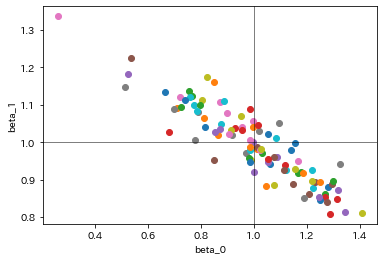

In [8]:
n=100; p=1
iter_num=100
for i in range(iter_num):
    x=randn(n)+2  # mean, standard deviation, and size
    e=randn (n)
    y=x+1+e
    b_1,b_0=min_sq(x,y)   
    plt.scatter(b_0,b_1)
plt.axhline(y=1.0,c="black",linewidth=0.5)
plt.axvline(x=1.0,c="black",linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

## 2.5 Statistical Testing of the estimated β value being zero

Text(0.5, 1.0, 'How does the t distribution change with the freedom?')

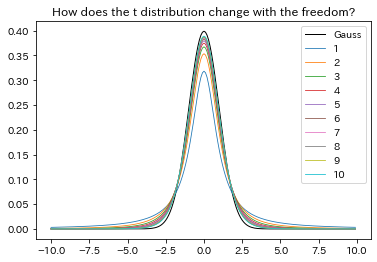

In [10]:
x=np.arange(-10,10,0.1)
plt.plot(x,stats.norm.pdf(x,0,1),label="Gauss",c="black",linewidth=1)
for i in range(1,11):
    plt.plot(x,stats.t.pdf(x, i),label='{}'.format(i),linewidth=0.8)
plt.legend(loc='upper right')
plt.title("How does the t distribution change with the freedom?")

In [11]:
N=100
x=randn(N);y=randn(N)
beta_1,beta_0=min_sq(x,y)
RSS=np.linalg.norm(y-beta_0-beta_1*x)**2
RSE=np.sqrt(RSS/(N-1-1))
B_0=(np.linalg.norm(x)**2/N)/np.linalg.norm(x-np.mean(x))**2
B_1=1/np.linalg.norm(x-np.mean(x))**2
se_0=RSE*np.sqrt(B_0)
se_1=RSE*np.sqrt(B_1)
t_0=beta_0/se_0
t_1=beta_1/se_1
p_0=2*(1-stats.t.cdf(np.abs(t_0),N-2))
p_1=2*(1-stats.t.cdf(np.abs(t_1),N-2))
beta_0,se_0,t_0,p_0 # intercept
beta_1,se_1,t_1,p_1 # coefficients

(-0.00661604996235588,
 0.09251520448480102,
 -0.0715131096472127,
 0.9431351321241737)

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x=x.reshape(-1,1) # the array size should be made clear in sklearn.
y=y.reshape(-1,1) # if we set one dimension, the other is automatically set when the other size is -1
reg.fit(x, y) # Execute
reg.coef_ ,reg.intercept_  # coefficients beta_1, intercept beta_0

(array([[-0.00661605]]), array([-0.05518506]))

In [13]:
import statsmodels.api as sm
X= np.insert(x, 0, 1, axis=1)
model = sm.OLS(y,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.005114
Date:                Wed, 11 Aug 2021   Prob (F-statistic):              0.943
Time:                        15:02:52   Log-Likelihood:                -130.88
No. Observations:                 100   AIC:                             265.8
Df Residuals:                      98   BIC:                             271.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0552      0.092     -0.603      0.5

Text(0, 0.5, 'density function')

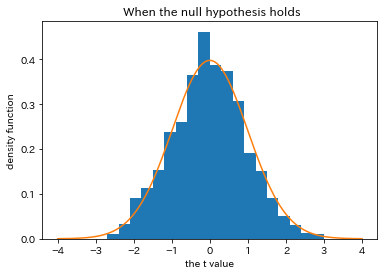

In [14]:
N=100;r=1000
T=[]
for i in range(r):
    x=randn(N);y=randn(N)
    beta_1,beta_0=min_sq(x,y)
    pre_y=beta_0+beta_1*x # prediction of y
    RSS=np.linalg.norm(y-pre_y)**2
    RSE=np.sqrt(RSS/(N-1-1))
    B_1=1/np.linalg.norm(x-np.mean(x))**2
    se_1=RSE*np.sqrt(B_1)
    T.append(beta_1/se_1)
plt.hist(T,bins=20,range=(-3,3),density=True)
x=np.linspace(-4,4,400)
plt.plot(x,stats.t.pdf(x,98))
plt.title(" When the null hypothesis holds")
plt.xlabel('the t value')
plt.ylabel('density function')

## 1.6 決定係数と共線形性の検出

In [ ]:
def R2(x,y):
    n=x.shape[0]
    xx=np.insert(x, 0, 1, axis=1)
    beta=np.linalg.inv(xx.T@xx)@xx.T@y
    y_hat=np.dot(xx,beta)
    y_bar=np.mean(y)
    RSS=np.linalg.norm(y-y_hat)**2
    TSS=np.linalg.norm(y-y_bar)**2
    return 1-RSS/TSS
N=100;m=2
x=randn(N,m)
y=randn(N)
R2(x,y)
# 1変量ならば, 決定係数は相関係数の2乗
x=randn(N,1)
y=randn(N)
R2(x,y)
xx=x.reshape(N)
np.corrcoef(xx,y)
np.corrcoef(xx,y)[0,1]**2  # 相関係数の２乗

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
x=boston.data
x.shape
def VIF(x):
    p=x.shape[1]
    values=[]
    for j in range(p):
        S=list(set(range(p))-{j})
        values.append(1/(1-R2(x[:,S],x[:,j])))
    return values
VIF(x)

## 2.7 Conficence and Prediction Intervals

Text(0, 0.5, 'y')

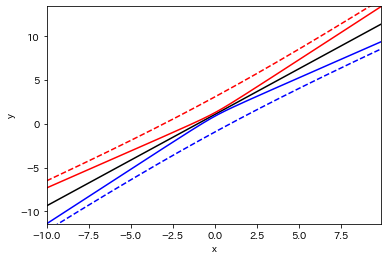

In [15]:
N=100;p=1
X=randn(N,p)
X=np.insert(X, 0, 1, axis=1)
beta=np.array([1,1])
epsilon=randn(N)
y=X@beta+epsilon
# Define the functions f(x) and g(x).
U=np.linalg.inv(X.T@X)
beta_hat=U@X.T@y
RSS=np.linalg.norm(y-X@beta_hat)**2
RSE=np.sqrt(RSS/(N-p-1))
alpha=0.05
def f(x,a):  # Confidence and prediction intervals for a=0 and a=1
    x=np.array([1,x])
    # stats.t.ppf(0.975,df=N-p-1) # the point s.t. the cumulative probability is 1-alpha/2
    range=stats.t.ppf(0.975,df=N-p-1)*RSE*np.sqrt(a+x@U@x.T)
    lower=x@beta_hat-range
    upper=x@beta_hat+range
    return ([lower,upper])
# Example
stats.t.ppf(0.975,df=1)  # the point for the probability p
12.706204736432095
x_seq=np.arange(-10,10,0.1)
# Confidence Interval
lower_seq1=[]; upper_seq1=[]
for i in range(len(x_seq)):
    lower_seq1.append(f(x_seq[i],0)[0])
    upper_seq1.append(f(x_seq[i],0)[1])
# Prediction Interval
lower_seq2=[]; upper_seq2=[]
for i in range(len(x_seq)):
    lower_seq2.append(f(x_seq[i],1)[0])
    upper_seq2.append(f(x_seq[i],1)[1])
yy=beta_hat[0]+beta_hat[1]*x_seq
plt.xlim(np.min(x_seq),np.max(x_seq))
plt.ylim(np.min(lower_seq1),np.max(upper_seq1))
plt.plot(x_seq,yy,c="black")
plt.plot(x_seq,lower_seq1,c="blue")
plt.plot(x_seq,upper_seq1,c="red")
plt.plot(x_seq,lower_seq2,c="blue",linestyle="dashed")
plt.plot(x_seq,upper_seq2,c="red",linestyle="dashed")
plt.xlabel("x")
plt.ylabel("y")